In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV 

%matplotlib inline

## Bag of Words and Tf-idf
In the above examples, each vector can be considered a *bag of words*. By itself these may not be helpful until we consider *term frequencies*, or how often individual words appear in documents. A simple way to calculate term frequencies is to divide the number of occurrences of a word by the total number of words in the document. In this way, the number of times a word appears in large documents can be compared to that of smaller documents.

However, it may be hard to differentiate documents based on term frequency if a word shows up in a majority of documents. To handle this we also consider *inverse document frequency*, which is the total number of documents divided by the number of documents that contain the word. In practice we convert this value to a logarithmic scale, as described [here](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Inverse_document_frequency).

Together these terms become [**tf-idf**](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

## Stop Words and Word Stems
Some words like "the" and "and" appear so frequently, and in so many documents, that we needn't bother counting them. Also, it may make sense to only record the root of a word, say `cat` in place of both `cat` and `cats`. This will shrink our vocab array and improve performance.

## Tokenization and Tagging
When we created our vectors the first thing we did was split the incoming text on whitespace with `.split()`. This was a crude form of *tokenization* - that is, dividing a document into individual words. In this simple example we didn't worry about punctuation or different parts of speech. In the real world we rely on some fairly sophisticated *morphology* to parse text appropriately.

Once the text is divided, we can go back and *tag* our tokens with information about parts of speech, grammatical dependencies, etc. This adds more dimensions to our data and enables a deeper understanding of the context of specific documents. For this reason, vectors become ***high dimensional sparse matrices***.

In [9]:
text = ['This is a line',
           "This is another line and has no connection with previous line",
       "Completely different line"]

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer
cv = CountVectorizer(stop_words='english') # ignore the stop words!! 
cv.fit_transform(text)

sparse_mat = cv.fit_transform(text)

In [17]:
sparse_mat

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [18]:
print(sparse_mat)

  (0, 3)	1
  (1, 3)	2
  (1, 1)	1
  (1, 4)	1
  (2, 3)	1
  (2, 0)	1
  (2, 2)	1


In [19]:
sparse_mat.todense() # Avoid for big Datasets

matrix([[0, 0, 0, 1, 0],
        [0, 1, 0, 2, 1],
        [1, 0, 1, 1, 0]], dtype=int64)

In [20]:
cv.vocabulary_

{'line': 3, 'connection': 1, 'previous': 4, 'completely': 0, 'different': 2}

In [21]:
tfidf_transformer = TfidfTransformer()

In [22]:
cv = CountVectorizer()
counts = cv.fit_transform(text)

In [23]:
counts

<3x12 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [24]:
counts.todense()

matrix([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
        [1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1],
        [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0]], dtype=int64)

In [25]:
tfidf = tfidf_transformer.fit_transform(counts)

In [26]:
tfidf.todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.61980538, 0.48133417, 0.        , 0.        ,
         0.61980538, 0.        ],
        [0.32355669, 0.32355669, 0.        , 0.32355669, 0.        ,
         0.32355669, 0.2460732 , 0.38219558, 0.32355669, 0.32355669,
         0.2460732 , 0.32355669],
        [0.        , 0.        , 0.65249088, 0.        , 0.65249088,
         0.        , 0.        , 0.38537163, 0.        , 0.        ,
         0.        , 0.        ]])

In [27]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('cv',CountVectorizer()),('tfidf',TfidfTransformer())])
results = pipe.fit_transform(text)
results

<3x12 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [28]:
results.todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.61980538, 0.48133417, 0.        , 0.        ,
         0.61980538, 0.        ],
        [0.32355669, 0.32355669, 0.        , 0.32355669, 0.        ,
         0.32355669, 0.2460732 , 0.38219558, 0.32355669, 0.32355669,
         0.2460732 , 0.32355669],
        [0.        , 0.        , 0.65249088, 0.        , 0.65249088,
         0.        , 0.        , 0.38537163, 0.        , 0.        ,
         0.        , 0.        ]])

### Instead do all at once!

In [29]:
tfidf = TfidfVectorizer()
new = tfidf.fit_transform(text)
new.todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.61980538, 0.48133417, 0.        , 0.        ,
         0.61980538, 0.        ],
        [0.32355669, 0.32355669, 0.        , 0.32355669, 0.        ,
         0.32355669, 0.2460732 , 0.38219558, 0.32355669, 0.32355669,
         0.2460732 , 0.32355669],
        [0.        , 0.        , 0.65249088, 0.        , 0.65249088,
         0.        , 0.        , 0.38537163, 0.        , 0.        ,
         0.        , 0.        ]])

# NLP with Naive Bayes

### The Data

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

This data originally came from Crowdflower's Data for Everyone library.

As the original source says,

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

#### The Goal: Create a Machine Learning Algorithm that can predict if a tweet is positive, neutral, or negative. In the future we could use such an algorithm to automatically read and flag tweets for an airline for a customer service agent to reach out to contact.

In [32]:
df = pd.read_csv("DATA/airline_tweets.csv")

In [33]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [34]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [35]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

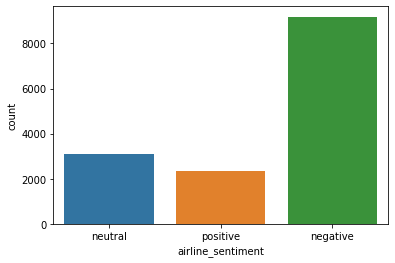

In [36]:
sns.countplot(data=df , x = 'airline_sentiment' )

<AxesSubplot:xlabel='airline', ylabel='count'>

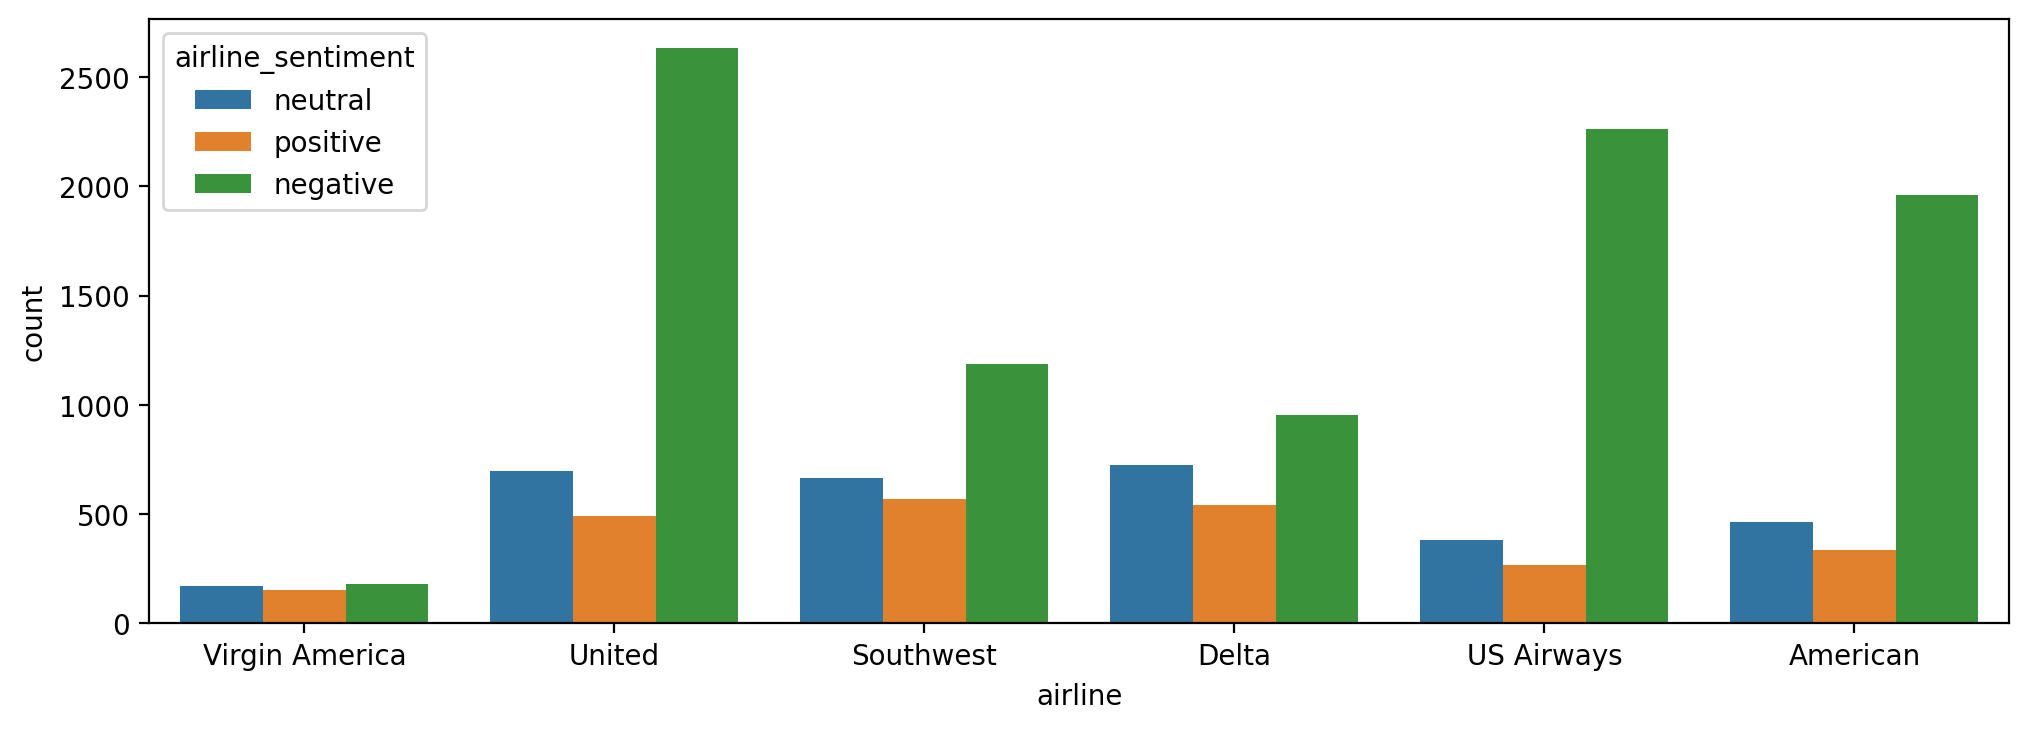

In [41]:
plt.figure(figsize=(12,4) , dpi=200)
sns.countplot(data=df,x='airline',hue='airline_sentiment')

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

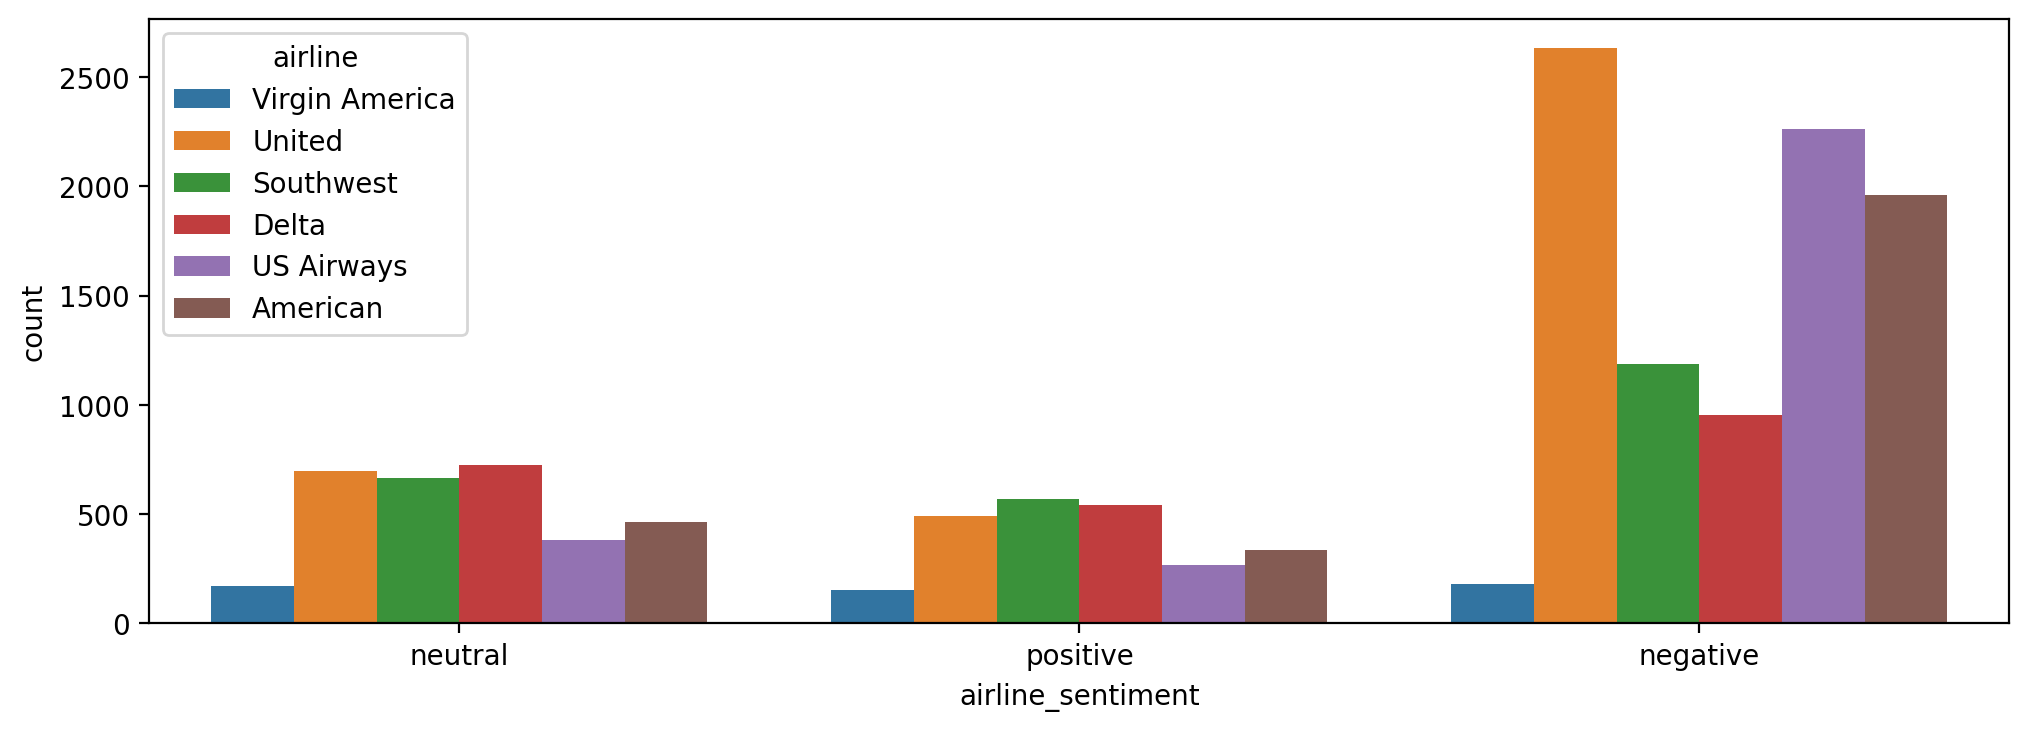

In [40]:
plt.figure(figsize=(12,4) , dpi=200)
sns.countplot(data=df,x='airline_sentiment',hue='airline') # 

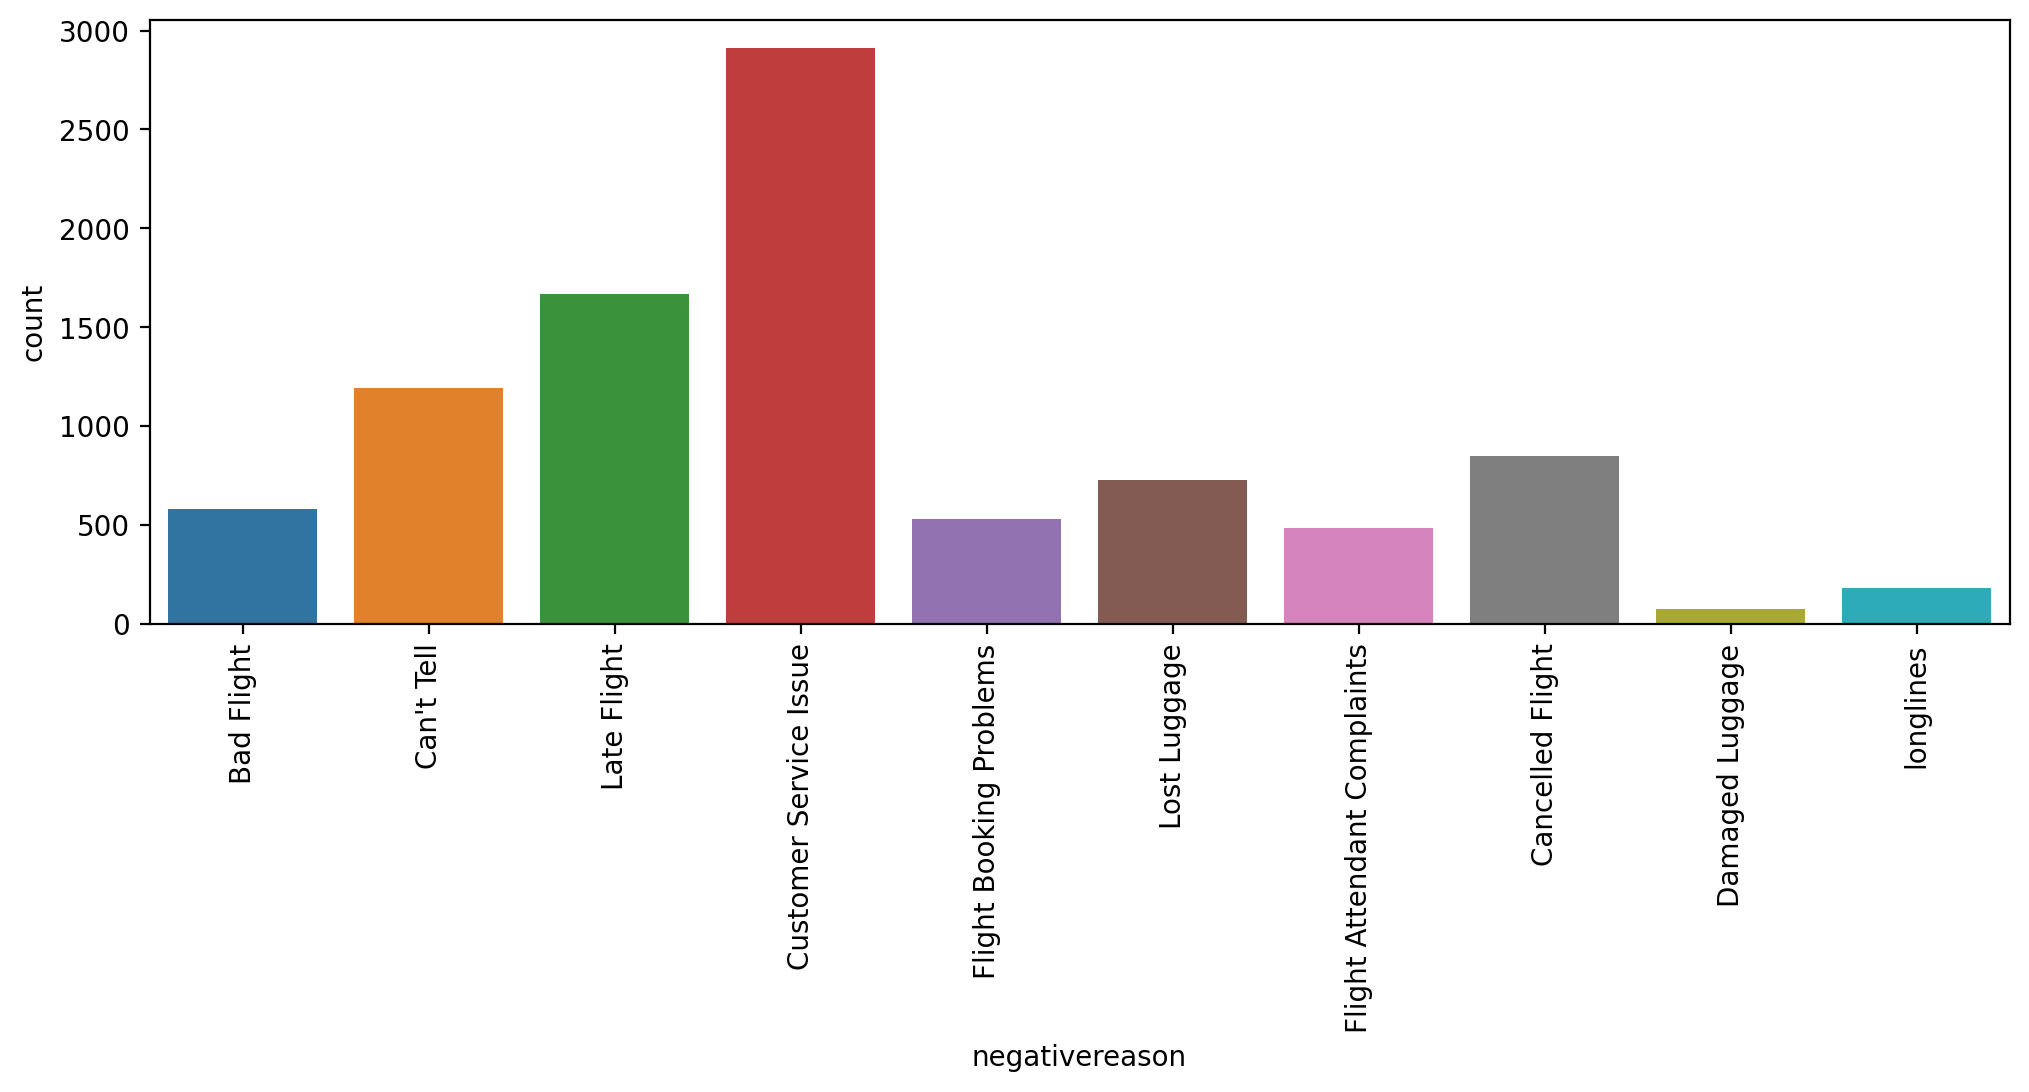

In [43]:
plt.figure(figsize=(12,4) , dpi=200)
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90);

In [44]:
data = df[['airline_sentiment','text']]

In [45]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [46]:
data.isna().sum()

airline_sentiment    0
text                 0
dtype: int64

In [47]:
def remove_tagged(text):
    text = " ".join([s for s in text.split() if "@" not in s])
    return text

In [49]:
remove_tagged("@VirginAmerica plus you've added commercials. I will complain to @DGM Usa")

"plus you've added commercials. I will complain to Usa"

In [52]:
data['text'] = data['text'].apply(remove_tagged)

<ipython-input-52-3f8a24154989>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(remove_tagged)


In [53]:
data.head()

,airline_sentiment,text
0,neutral,What said.
1,positive,plus you've added commercials to the experienc...
2,neutral,I didn't today... Must mean I need to take ano...
3,negative,"it's really aggressive to blast obnoxious ""ent..."
4,negative,and it's a really big bad thing about it


In [55]:
y = data['airline_sentiment']
X = data['text']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [57]:
X_test_tfidf

<2928x12254 sparse matrix of type '<class 'numpy.float64'>'
	with 21872 stored elements in Compressed Sparse Row format>

In [58]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [59]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [60]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [61]:
from sklearn.metrics import plot_confusion_matrix,classification_report
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

NB MODEL
              precision    recall  f1-score   support

    negative       0.67      0.99      0.80      1817
     neutral       0.79      0.16      0.26       628
    positive       0.87      0.18      0.30       483

    accuracy                           0.68      2928
   macro avg       0.78      0.44      0.45      2928
weighted avg       0.73      0.68      0.60      2928



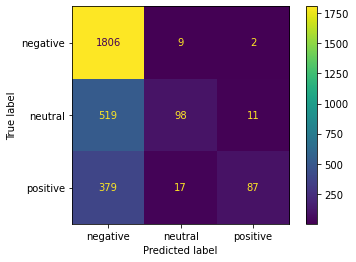

In [62]:
print("NB MODEL")
report(nb)

Logistic Regression
              precision    recall  f1-score   support

    negative       0.79      0.94      0.85      1817
     neutral       0.64      0.44      0.52       628
    positive       0.81      0.55      0.66       483

    accuracy                           0.77      2928
   macro avg       0.74      0.64      0.68      2928
weighted avg       0.76      0.77      0.75      2928



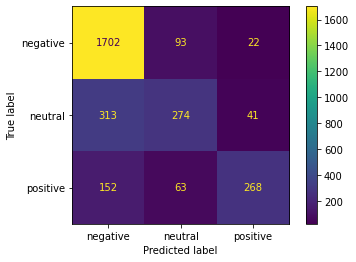

In [63]:
print("Logistic Regression")
report(log)

SVC
              precision    recall  f1-score   support

    negative       0.82      0.90      0.86      1817
     neutral       0.60      0.52      0.56       628
    positive       0.75      0.62      0.68       483

    accuracy                           0.77      2928
   macro avg       0.72      0.68      0.70      2928
weighted avg       0.76      0.77      0.76      2928



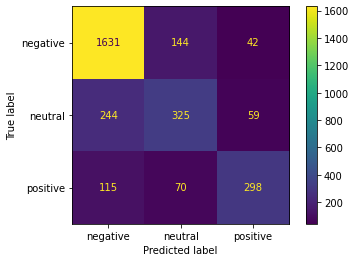

In [64]:
print('SVC')
report(svc)

In [65]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])
pipe.fit(df['text'],df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [66]:
pipe.predict( ['good flight'])

array(['positive'], dtype=object)

In [67]:
pipe.predict( ['It was a terrible flight. I though things would get better!'])

array(['negative'], dtype=object)

In [69]:
pipe.predict( ['Things could have been way better'])

array(['negative'], dtype=object)

In [70]:
pipe.predict( ['The behaviour could have been nice'])

array(['negative'], dtype=object)

In [71]:
pipe.predict( ['The behaviour was nice'])

array(['positive'], dtype=object)

## Using the same data with Tensorflow Models

In [72]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [73]:
data.head()

,airline_sentiment,text
0,neutral,What said.
1,positive,plus you've added commercials to the experienc...
2,neutral,I didn't today... Must mean I need to take ano...
3,negative,"it's really aggressive to blast obnoxious ""ent..."
4,negative,and it's a really big bad thing about it


In [74]:
data['airline_sentiment'].value_counts() # 

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### heavy imbalance ; we'll deal with that later
* We can either club the Neutral and Positive together as our priority is getting the negative ones
* Or we can augment more data


In [75]:
sentences = data['text'].values

In [76]:
sentences.shape

(14640,)

In [80]:
sentences[3]

'it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

In [81]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(sentences)

In [83]:
word_index = tokenizer.word_index

In [84]:
word_index

{'to': 1,
 'the': 2,
 'i': 3,
 'a': 4,
 'you': 5,
 'for': 6,
 'flight': 7,
 'on': 8,
 'and': 9,
 'my': 10,
 'is': 11,
 'in': 12,
 'of': 13,
 'me': 14,
 'it': 15,
 'your': 16,
 'have': 17,
 'was': 18,
 'not': 19,
 'with': 20,
 'no': 21,
 'that': 22,
 'at': 23,
 'this': 24,
 'get': 25,
 'but': 26,
 't': 27,
 'co': 28,
 'be': 29,
 'from': 30,
 'http': 31,
 'can': 32,
 'are': 33,
 'thanks': 34,
 'cancelled': 35,
 'we': 36,
 'now': 37,
 'an': 38,
 'just': 39,
 'service': 40,
 'do': 41,
 'so': 42,
 '2': 43,
 'help': 44,
 'been': 45,
 'time': 46,
 'will': 47,
 'customer': 48,
 'up': 49,
 'out': 50,
 'our': 51,
 'they': 52,
 "i'm": 53,
 'amp': 54,
 'hours': 55,
 'us': 56,
 'what': 57,
 'when': 58,
 'flights': 59,
 'how': 60,
 'hold': 61,
 'plane': 62,
 'if': 63,
 'all': 64,
 'why': 65,
 'thank': 66,
 'still': 67,
 'there': 68,
 'one': 69,
 'please': 70,
 'need': 71,
 'would': 72,
 'delayed': 73,
 "can't": 74,
 'back': 75,
 'gate': 76,
 'call': 77,
 'about': 78,
 'had': 79,
 'flightled': 80,
 '

In [85]:
len(word_index)

14912

In [86]:
total_words = len(tokenizer.word_index) + 1


In [92]:
sequences = tokenizer.texts_to_sequences(sentences)

In [93]:
padded_sequences = pad_sequences(sequences, maxlen=10 , padding = 'post' , truncating='post')

In [94]:
padded_sequences[300]

array([132,   2, 245, 189,   5, 127,   1,   2, 110,   0])

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)